In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import piecewise_regression
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [95]:
def load_plot_data(data_list, thickness_list, cut_off_load = 2):
    # convert in to um
    for i in range(len(data_list)):
        data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

    thickness = thickness_list
    # convert in to um
    for i in range(len(data_list)): 
        data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
        # create stress column which is load / area, the area is 19.635 mm^2
        data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
        # create strain column which is displacement / thickness, the thickness is shown above
        data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]

    data_list_cleaned = []
    # Plot these in the same graph to compare them
    plt.figure(figsize=(8, 6))
    for i in range(len(data_list)):
        data_name = namestr(data_list[i], globals())
        data = data_list[i][data_list[i]['Ch:Load (N)'] > cut_off_load]
        data = data.loc[:data['Ch:Load (N)'].idxmax()]
        # shift the data so that the first point is at 0 in 'S:LVDT (in)'
        data['strain'] = data['strain'] - data['strain'].iloc[0]
        data_list_cleaned.append(data)
        plt.plot(data['strain'], data['stress (bar)'], label=data_name)
    # show title and labels
    #plt.title('No Heating 4th sample (4 days)')
    #plt.xlim(0,0.2)
    #plt.ylim(0,30)
    plt.xlabel('Strain')
    plt.ylabel('Stress (bar)')
    plt.legend(loc='upper left')
    plt.show()
    # concatenate all the data into one dataframe
    data_all = pd.concat(data_list_cleaned, ignore_index=True)
    # sort the values by strain
    data_all = data_all.sort_values(by='strain')
    return data_all

# define a function of the entire work flow from data to the final result
def piecewise_regression_fit(data, n_breakpoints=5):
    pw_fit = piecewise_regression.Fit(list(data['strain']), list(data['stress (bar)']), n_breakpoints=n_breakpoints)
    pw_fit.plot_fit(color="red", linewidth=2)
    pw_fit.plot_data(color="grey", s=1)
    pw_fit.plot_breakpoints()
    pw_fit.plot_breakpoint_confidence_intervals()
    plt.title("Piecewise Regression")
    plt.xlabel("Strain")
    plt.ylabel("Stress (bar)")
    plt.show()
    pw_fit.summary()
    return pw_fit


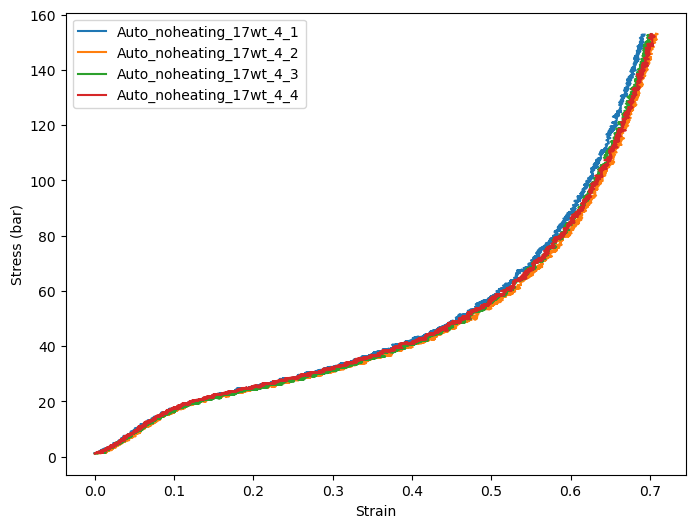

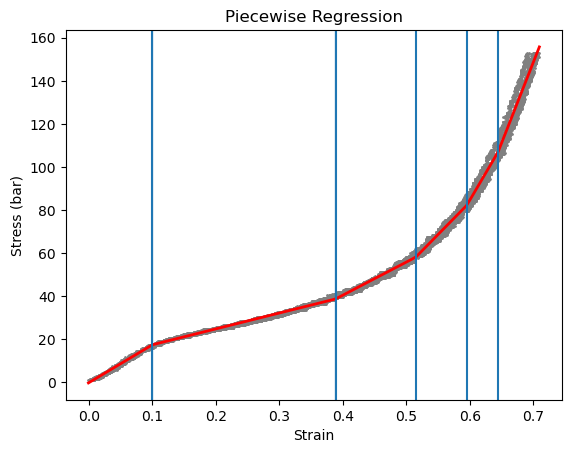


                    Breakpoint Regression Results                     
No. Observations                    21135
No. Model Parameters                   12
Degrees of Freedom                  21123
Res. Sum of Squares               79516.1
Total Sum of Squares          2.98407e+07
R Squared                        0.997335
Adjusted R Squared               0.997334
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const              -0.113662       0.0658      -1.7276        0.0841     -0.24262     0.015299
alpha1               175.795         1.19       147.37           0.0       173.46       178.13
beta1               -102.194         1.22      -83.629             -      -104.59      -99.799
beta2                79.9423        0.915       87.413             -        78.15       81.735
beta3            

In [96]:
Auto_noheating_17wt_4_1 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-1-240226_02262024_163853.csv')
Auto_noheating_17wt_4_2 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-2-240226_02262024_164117.csv')
Auto_noheating_17wt_4_3 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-3-240226_02262024_164351.csv')
Auto_noheating_17wt_4_4 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-4-240226_02262024_164621.csv')

data_list = [Auto_noheating_17wt_4_1, Auto_noheating_17wt_4_2, Auto_noheating_17wt_4_3, Auto_noheating_17wt_4_4]
all_data_17 = load_plot_data(data_list, thickness_list= [109,106,106,105])
fit_17 = piecewise_regression_fit(all_data_17, n_breakpoints=5)

In [86]:
yield_strength_est = fit_17_json['const']['estimate']+fit_17_json['alpha1']['estimate']*fit_17_json['breakpoint1']['estimate']
yield_strength_est

17.470195061469273

In [87]:
yield_strength_se = fit_17_json['const']['se']+fit_17_json['alpha1']['se']*fit_17_json['breakpoint1']['se']
yield_strength_se

0.06678351837783811

In [88]:
elastic_modulus_est = fit_17_json['alpha1']['estimate']
elastic_modulus_est

175.79509853618893

In [93]:
fit_17_json

{'const': {'estimate': -0.11366242837204832,
  'se': 0.06579429191560777,
  'confidence_interval': (-0.24262426052333266, 0.015299403779236026),
  't_stat': -1.7275423910305086,
  'p_t': 0.08408491596047445},
 'beta1': {'estimate': -102.20093355292977,
  'se': 1.2220800569758996,
  'confidence_interval': (-104.59630370730895, -99.80556339855059),
  't_stat': -83.62867307223004,
  'p_t': '-'},
 'breakpoint1': {'estimate': 0.10002473127100033,
  'se': 0.0008292468027785664,
  'confidence_interval': (0.0983993442673817, 0.10165011827461895),
  't_stat': '-',
  'p_t': '-'},
 'beta2': {'estimate': 79.77926489266885,
  'se': 0.9152114461216228,
  'confidence_interval': (77.98538062913637, 81.57314915620132),
  't_stat': 87.17030936484481,
  'p_t': '-'},
 'breakpoint2': {'estimate': 0.38842473417115186,
  'se': 0.0009817485669054969,
  'confidence_interval': (0.3865004320742097, 0.39034903626809403),
  't_stat': '-',
  'p_t': '-'},
 'beta3': {'estimate': 146.07328754458544,
  'se': 1.87184144

In [94]:
fit_17.get_results()['rss']

79515.71546777668

In [ ]:
def extract_properties(fit):
    fit = fit.get_results()
    elastic_modulus_est = fit['alpha1']['estimate']
    elastic_modulus_se = fit['alpha1']['se']
    yield_strength_est = fit['const']['estimate']+fit['alpha1']['estimate']*fit['breakpoint1']['estimate']
    yield_strength_se = fit['const']['se']+fit['alpha1']['se']*fit['breakpoint1']['se']
    rss = fit['rss']
    return elastic_modulus_est, elastic_modulus_se, yield_strength_est, yield_strength_se, rss

In [89]:
elastic_modulus_se = fit_17_json['alpha1']['se']
elastic_modulus_se

1.1929216475911824

In [81]:
print(fit_17_json['alpha1']['estimate'], fit_17_json['breakpoint1']['estimate'])

175.79509853618893 0.10002473127100033


In [83]:
fit_17.get_results()

{'estimates': {'const': {'estimate': -0.11366242837204832,
   'se': 0.06579429191560777,
   'confidence_interval': (-0.24262426052333266, 0.015299403779236026),
   't_stat': -1.7275423910305086,
   'p_t': 0.08408491596047445},
  'beta1': {'estimate': -102.20093355292977,
   'se': 1.2220800569758996,
   'confidence_interval': (-104.59630370730895, -99.80556339855059),
   't_stat': -83.62867307223004,
   'p_t': '-'},
  'breakpoint1': {'estimate': 0.10002473127100033,
   'se': 0.0008292468027785664,
   'confidence_interval': (0.0983993442673817, 0.10165011827461895),
   't_stat': '-',
   'p_t': '-'},
  'beta2': {'estimate': 79.77926489266885,
   'se': 0.9152114461216228,
   'confidence_interval': (77.98538062913637, 81.57314915620132),
   't_stat': 87.17030936484481,
   'p_t': '-'},
  'breakpoint2': {'estimate': 0.38842473417115186,
   'se': 0.0009817485669054969,
   'confidence_interval': (0.3865004320742097, 0.39034903626809403),
   't_stat': '-',
   'p_t': '-'},
  'beta3': {'estimate':

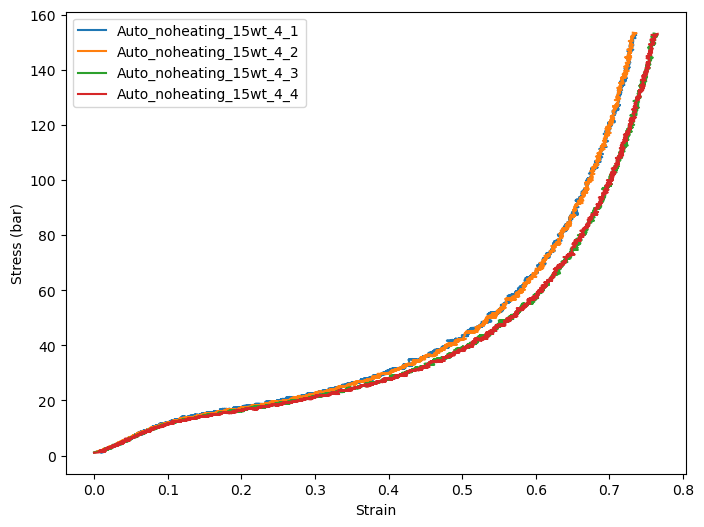

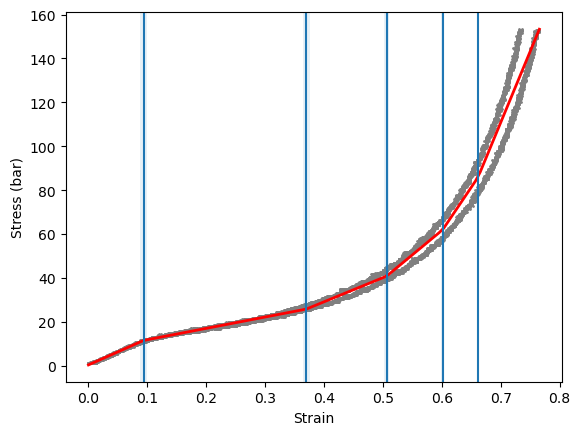


                    Breakpoint Regression Results                     
No. Observations                    21757
No. Model Parameters                   12
Degrees of Freedom                  21745
Res. Sum of Squares           4.64566e+05
Total Sum of Squares          3.17964e+07
R Squared                        0.985389
Adjusted R Squared               0.985381
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               0.320778         0.17       1.8876        0.0591     -0.01232      0.65388
alpha1               119.307         3.28       36.337        1e-280       112.87       125.74
beta1               -67.6027         3.35       -20.15             -      -74.179      -61.027
beta2                58.4271         2.06       28.417             -       54.397       62.457
beta3            

In [71]:
Auto_noheating_15wt_4_1 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-1-240226_02262024_162514.csv')
Auto_noheating_15wt_4_2 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-2-240226_02262024_162808.csv')
Auto_noheating_15wt_4_3 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-3-240226_02262024_163110.csv')
Auto_noheating_15wt_4_4 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-4-240226_02262024_163353.csv')

data_list = [Auto_noheating_15wt_4_1, Auto_noheating_15wt_4_2, Auto_noheating_15wt_4_3, Auto_noheating_15wt_4_4]
all_data_15 = load_plot_data(data_list, thickness_list= [109,103,100,100])
fit_15 = piecewise_regression_fit(all_data_15, n_breakpoints=5)

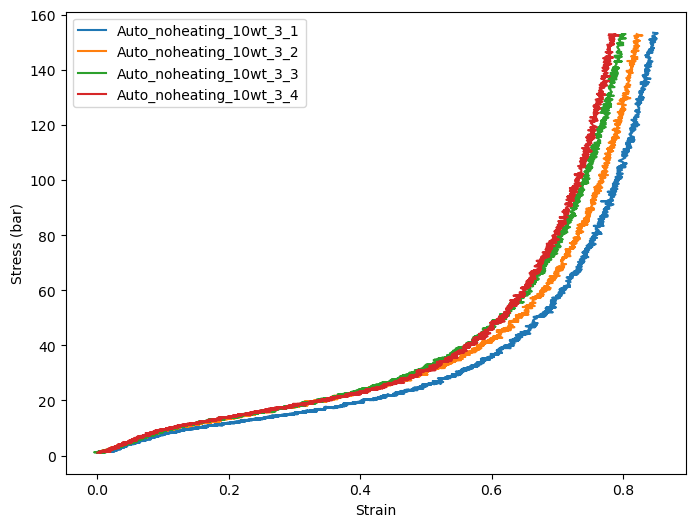

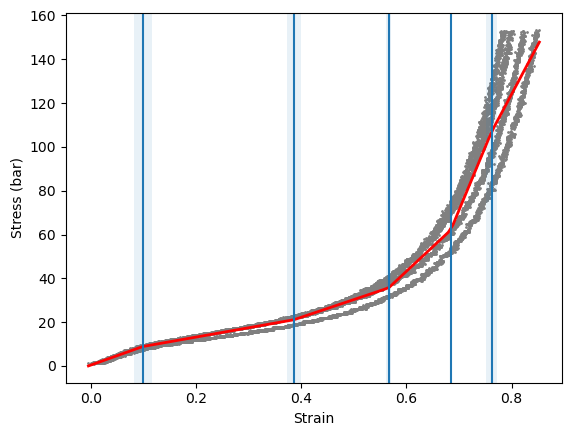


                    Breakpoint Regression Results                     
No. Observations                    23825
No. Model Parameters                   12
Degrees of Freedom                  23813
Res. Sum of Squares           1.23649e+06
Total Sum of Squares          3.29175e+07
R Squared                        0.962437
Adjusted R Squared               0.962418
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               0.435854        0.283       1.5425         0.123     -0.11799       0.9897
alpha1               85.7464         5.58       15.378      4.16e-53       74.817       96.676
beta1               -43.2548         5.69      -7.5978             -      -54.414      -32.096
beta2                38.2277         1.87       20.433             -       34.561       41.895
beta3            

In [72]:
Auto_noheating_10wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-1-240212_02122024_160514.csv')
Auto_noheating_10wt_3_2 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-2-240212_02122024_160815.csv')
Auto_noheating_10wt_3_3 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-3-240212_02122024_161038.csv')
Auto_noheating_10wt_3_4 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-4-240212_02122024_161307.csv')

data_list = [Auto_noheating_10wt_3_1, Auto_noheating_10wt_3_2, Auto_noheating_10wt_3_3, Auto_noheating_10wt_3_4]
all_data_10 = load_plot_data(data_list, thickness_list= [109,113,107,106])
fit_10 = piecewise_regression_fit(all_data_10, n_breakpoints=5)

{'const': {'estimate': -0.13546575161585644, 'se': 0.13428982527737576, 'confidence_interval': (-0.3986785402895594, 0.1277470370578465), 't_stat': -1.0087566301918391, 'p_t': 0.3130986954124426}, 'beta1': {'estimate': -101.16998298227966, 'se': 2.5459854410596363, 'confidence_interval': (-106.16020414371009, -96.17976182084924), 't_stat': -39.737062651926564, 'p_t': '-'}, 'breakpoint1': {'estimate': 0.09774624651806751, 'se': 0.0016941701986089013, 'confidence_interval': (0.09442561324192268, 0.10106687979421235), 't_stat': '-', 'p_t': '-'}, 'beta2': {'estimate': 98.55084544183612, 'se': 1.6871653532589854, 'confidence_interval': (95.243941909363, 101.85774897430923), 't_stat': 58.41208465517146, 'p_t': '-'}, 'breakpoint2': {'estimate': 0.406379332612077, 'se': 0.0015459133856446608, 'confidence_interval': (0.40334928791253943, 0.40940937731161453), 't_stat': '-', 'p_t': '-'}, 'beta3': {'estimate': 196.83902230026877, 'se': 3.214988910643902, 'confidence_interval': (190.53753076896524